# Cat vs Dog Image Classification (CNN)

## A general CNN architecture

![CNN architecture](https://miro.medium.com/v2/resize:fit:1400/1*d_xC3OqjOCYQtMfLawxzgg.png)

In [1]:
"""Importing Imp Libraries"""
import os
from PIL import Image
import random

import numpy as np
import tensorflow as tf


from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


# Read The Data

In [2]:
# define the dir path of train and test

train_dir= "/kaggle/input/dogs-vs-cats/train"
test_dir = "/kaggle/input/dogs-vs-cats/test"


In [3]:
# let's check the train dir
x = os.listdir(train_dir)
print("Inside the train dir: ", x)


# now we will find out the num of data inside each of the dog and cat folder

#dogs fol
dogs = len(os.listdir(os.path.join(train_dir, "dogs")))
print("num of dog images in train_dir's dogs fol: ", dogs)

#cats fol
cats = len(os.listdir(os.path.join(train_dir, "cats")))
print("num of cat images in train_dir's cats fol: ", cats)


Inside the train dir:  ['dogs', 'cats']
num of dog images in train_dir's dogs fol:  10000
num of cat images in train_dir's cats fol:  10000


### Using indexing-slicling

In [4]:
# let see what in inside the dogs and the cats dir
dog_data = os.listdir(os.path.join(train_dir,"dogs")) 
cat_data = os.listdir(os.path.join(train_dir, "cats"))

#now it's time to print
print("this is dog what inside the dog_data: ",dog_data[:5])
print("this is dog what inside the dog_data: ",cat_data[:5])


this is dog what inside the dog_data:  ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.3259.jpg']
this is dog what inside the dog_data:  ['cat.12461.jpg', 'cat.10176.jpg', 'cat.8194.jpg', 'cat.3498.jpg', 'cat.891.jpg']


# Display The Image Data 

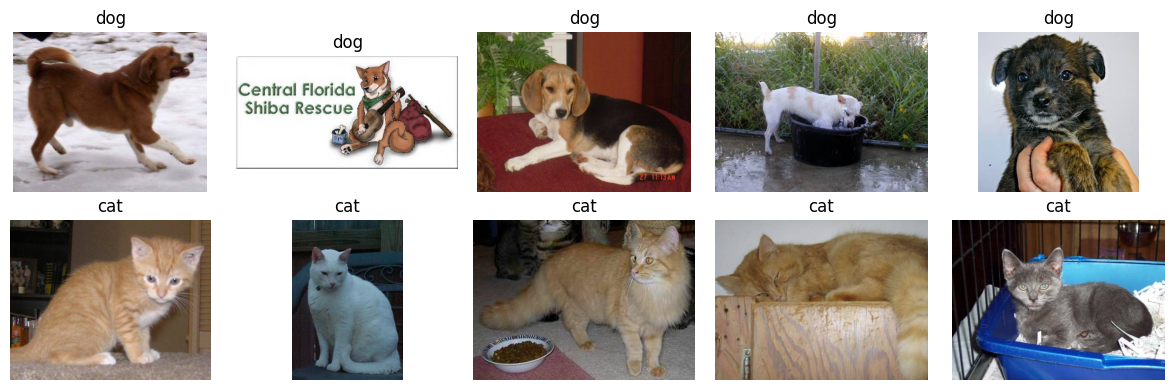

In [5]:
"""Display Some Image Data"""

dog_data = os.listdir(os.path.join(train_dir,"dogs")) 
cat_data = os.listdir(os.path.join(train_dir, "cats"))

def display_images(dog,cat,num_of_images=5):

    # here we are randomly selecting few images
    dog_image = random.sample(dog,num_of_images)
    cat_image = random.sample(cat,num_of_images)

    plt.figure(figsize=(12,4)) # creating dims for our figure. weidth=10 and height = 5

    
    for i in range(num_of_images):

        #for the dog
        plt.subplot(2,num_of_images,i+1) # we are creating subplot inside the figure. nrows,ncols,num_of_current_img
        img = Image.open(os.path.join(train_dir,"dogs", dog_image[i])) # storing the image inside img, by constructing the path
        plt.imshow(img)
        plt.title("dog")
        plt.axis('off')


        # for the cat
        plt.subplot(2,num_of_images,i+num_of_images+1)
        img = Image.open(os.path.join(train_dir,"cats", cat_image[i]))
        plt.imshow(img)
        plt.title("cat")
        plt.axis("off")

    plt.tight_layout() ## To make sure the subplots don't overlap
    plt.show()

display_images(dog_data,cat_data) 
        

# Data Loading and Augmentaiton

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Initialize the ImageDataGenerator for validation 
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(256, 256), 
    batch_size=32,
    class_mode='binary', 
    seed=123
)

# Create the validation data generator
val_data = val_datagen.flow_from_directory(   
    directory=train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    seed=123
)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


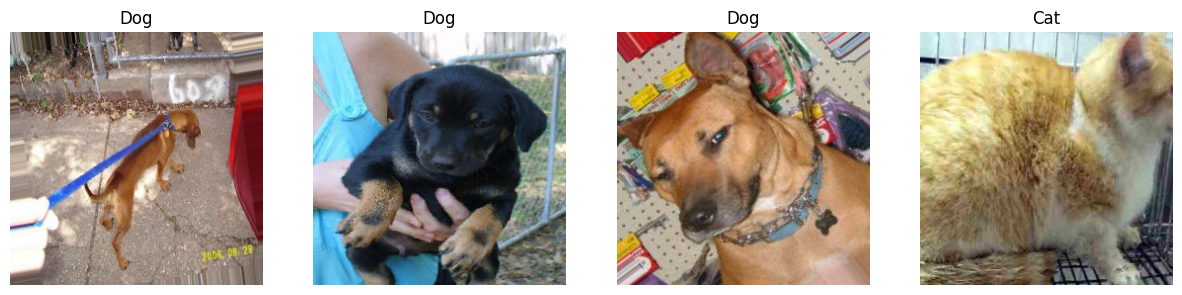

In [ ]:

# Display a batch of augmented images
image_batch, label_batch = next(train_data)
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title('Dog' if label_batch[i] == 1 else 'Cat')
    plt.axis('off')
plt.show()


In [9]:
image_batch.shape

(32, 256, 256, 3)

In [10]:
label_batch.shape

(32,)

## Model Architecture


In [12]:

from keras.layers import Dropout

# creating the model architecture

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


 
model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))

# Output layer
model.add(Dense(1,activation='sigmoid'))
        

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

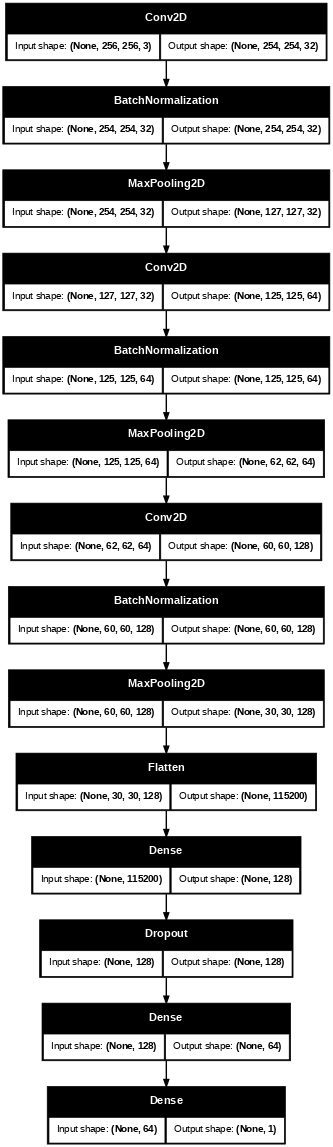

In [14]:
plot_model(model, show_shapes = True, dpi =50)

In [15]:
"""Now let's compile the model"""

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [16]:
"""Let us define check-point and early stopping"""
from keras.callbacks import ModelCheckpoint, EarlyStopping

# this will save the best model
checkpoint = ModelCheckpoint(

    'best_model.keras',
    monitor = 'val_accuracy',
    save_best_only = True,
    mode = max,
    verbose = 1
)


earlystop = EarlyStopping(

    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True,
    verbose = 1
)

<ipython-input-16-c2eb50a711b1>:5: UserWarning: ModelCheckpoint mode '<built-in function max>' is unknown, fallback to auto mode.
  checkpoint = ModelCheckpoint(


In [17]:
history = model.fit(train_data,epochs=50, validation_data=val_data,callbacks=[checkpoint,earlystop])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.5407 - loss: 3.3812
Epoch 1: val_accuracy improved from -inf to 0.61250, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 440s 680ms/step - accuracy: 0.5407 - loss: 3.3786 - val_accuracy: 0.6125 - val_loss: 0.6439
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5704 - loss: 0.6707
Epoch 2: val_accuracy improved from 0.61250 to 0.63350, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 515ms/step - accuracy: 0.5705 - loss: 0.6707 - val_accuracy: 0.6335 - val_loss: 0.6348
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.5916 - loss: 0.6613
Epoch 3: val_accuracy did not improve from 0.63350
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 515ms/step - accuracy: 0.5916 - loss: 0.6613 - val_accuracy: 0.5842 - val_loss: 0.6609
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.5998 - loss: 0.6450
Epoch 4: val_accuracy improved from 0.63350 to 0.63695, saving model t

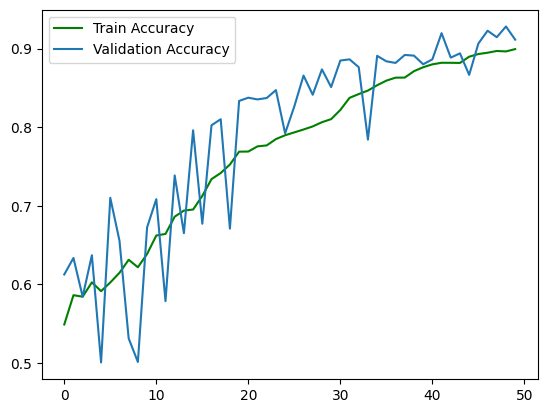

In [18]:
"""from the info we can already see that the model is overfitted but let's go and plot it"""

plt.plot(history.history['accuracy'], label= 'Train Accuracy',color ='green')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

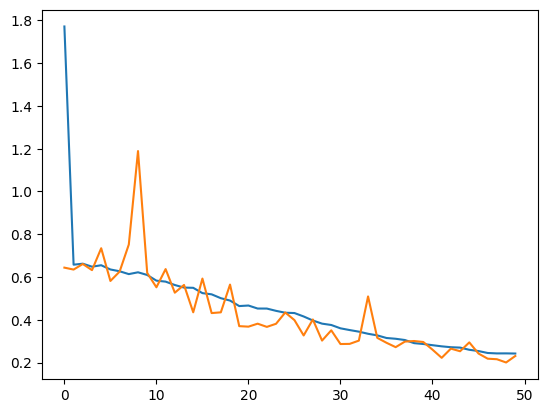

In [19]:
plt.plot(history.history['loss'],label ='train loss')
plt.plot(history.history['val_loss'],label= 'validation loss')

# Model Evalueation

In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle= True,
    seed=123
)


Found 5000 images belonging to 2 classes.


In [21]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.9175 - loss: 0.2237
Test Loss: 0.22620591521263123
Test Accuracy: 0.9151999950408936


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


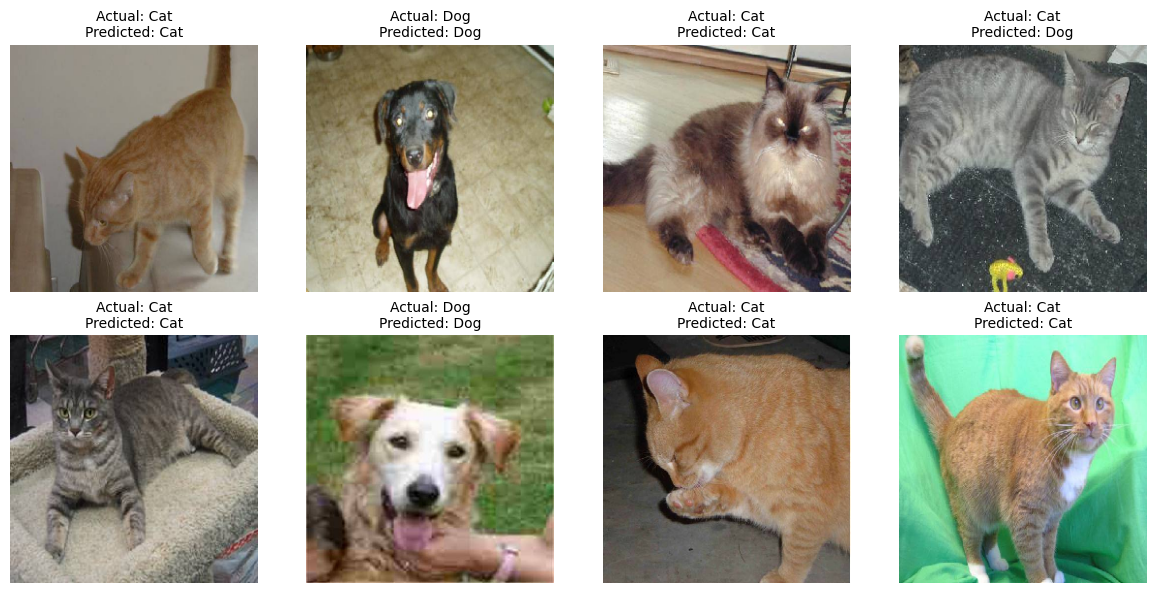

In [ ]:
""" Display Model Predictions on Test Data """
def display_predictions(model, test_data, num_images=8):
    test_images, true_labels = next(test_data)

    # Predict on test images
    predictions = model.predict(test_images)
    predicted_labels = np.where(predictions > 0.5, 1, 0)  

    # Display images with actual & predicted labels
    plt.figure(figsize=(12, 6))
    for i in range(min(num_images, len(test_images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(test_images[i])
        
        actual_label = "Dog" if true_labels[i] == 1 else "Cat"
        predicted_label = "Dog" if predicted_labels[i] == 1 else "Cat"

        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


display_predictions(model, test_data)
